<a href="https://colab.research.google.com/github/kleeresearch/TextAnalysis/blob/master/Course/Day2/7_Copy_of_network_analysis_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

네트워크 분석을 위해 3가지 작업 수행
1. create a network
2. nodes
3. edges

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

Graph 펑션을 사용.

In [8]:
# Greate an empty graph
g = nx.Graph()

노드를 추가한다. 추가 방법 2가지.
1. 한 번에 하나의 노드를 추가하는 방법 - 이름이 1인 노드를 추가한다.
2. 한 번에 여러개의 노드를 추가하는 방법 - add_nodes_from으로 리스트 데이터 추가
- 1,2,3,4,5,6 노드를 한 번에 추가하겠다.

In [9]:
g.add_nodes_from([1,2,3,4,5,6]) # Add nodes from a list
#g.add_node(1)

nodes 펑션을 적용해보면 해당 네트워크에 포함되어 있는 노드의 정보가 나온다.

In [10]:
g.nodes()

NodeView((1, 2, 3, 4, 5, 6))

특정 네트워크에 포함되어 있는 edge 펑션을 적용해 볼 수 있다.
아무것도 없는 결과가 나온다.
왜냐하면 노드 정보만 있고 엣지 정보는 추가하지 않았기 때문이다.

In [11]:
g.edges()

EdgeView([])

엣지를 추가하는 방법도 노드와 마찬가지로 2가지 방법
1. 한 번에 하나의 엣지 추가
2. 한 번에 여러개의 엣지 추가
- add_edges_from 으로 리스트 데이터 추가
- (1,3)은 1번 노드와 3번 노드 사이에 존재하는 엣지를 추가하겠다 의미.

In [25]:
# Add egdes from a list
g.add_edges_from([(1,3), (2,4), (2,5), (2,6), (3,4), (4,6), (5,6)])
#g.add_edge(1,3)

In [26]:
print(g.nodes())
print(g.edges())

[1, 2, 3, 4, 5, 6]
[(1, 3), (2, 4), (2, 5), (2, 6), (3, 4), (4, 6), (5, 6)]


1번과 3번 사이에 존재하는 엣지, 2번과 4번 사이에 존재하는 엣지, 등등 한번에 여러개의 엣지를 추가할 수 있다. g 라는 그래프 안에 존재하는 노드와 엣지의 정보를 확인할 수 있다. 해당 그래프 안에 존재하는 엣지 정보가 될 수 있다.

In [27]:
# basic calculations
print(g.number_of_nodes()) # number of nodes
print(g.number_of_edges()) # number of edges

6
7


6개의 노드와 7개의 엣지가 있다.

특정 노드에 대한 정보는 숫자를 입력해주변 된다. 노드 3에 대한 정보를 입력해서 확인해 본다.

In [28]:
g[3]

AtlasView({1: {'weight': 3}, 4: {'weight': 2}})

1번 노드와 4번 노드 정보가 나왔다.

In [29]:
list(g.neighbors(5))

[2, 6]

5번 노드의 정보가 이웃 노드의 목록인 2번 노드와 6번 노드 정보를 확인할 수 있다.

시각화를 위해서는 draw_networkx 펑션을 사용하면 된다.

install gephi 에 관한 것.


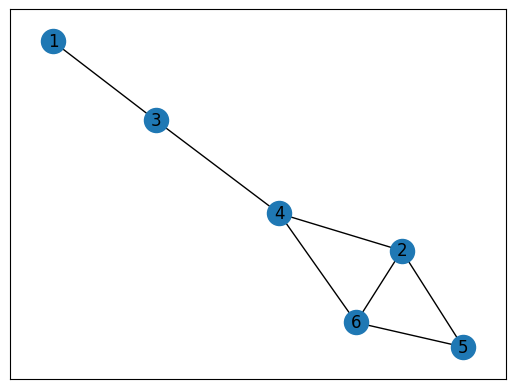

In [17]:
# networkX를 이용해서 시각화 하기
nx.draw_networkx(g)
plt.show()

gephi는 시각화 목적으로 사용한다.

gephi를 맥/윈도우에서 다운 받는다. install gephi 구글링

gephi에 맞는 파일로 다운 받은 다음에 나머지를 gephi에서 작업한다.

In [42]:
# graphML 파일로 저장하기 -> Gephi에서 불러오기
nx.write_graphml(g, '../test.graphml')

test.graphml이라는  파일이 생성되었다.

노드가 가지는 속성

- 사람 (키, 몸무게, 성별, 정치 성향) 등에 따라 노드 다르게 설정 가능. 속성 유형에 따라 사용하는 방법이 다름. 속성의 종류는 2가지로 구분 가능.
    - 명목변수에 해당하는 속성(유한, 특정그룹의 이름 의미): 성별(남,녀), 정치 성향
    - 연속변수에 해당하는 속성(무한): 키, 몸무게
- 명목변수 변경할 때 - 파티션 방법 사용
- 연속변수 변경할 때 - 랭킹 방법 사용

어떠한 변수에 속성을 임시적으로 입력하지 않았음. 각각의 노드가 하나의 속성 정보를 기본으로 가지게 된다. 이웃 노드의 수다. 이웃 노드의 수라는 속성을 추가하지 않아도 네트워크를 통해 다른 노드의 수를 파악할 수 있다. 그러한 정보가 각각의 노드에 기보적 속성으로 저장이 된다. 네트워크 분석에서는 이웃 노드의 수를 degree라고 한다.

In [31]:
# Add node attributes
g.nodes[1]['gender']='male'
g.nodes[2]['gender']='female'
g.nodes[3]['gender']='male'
g.nodes[4]['gender']='female'
g.nodes[5]['gender']='male'
g.nodes[6]['gender']='male'

In [32]:
nx.get_node_attributes(g, 'gender')

{1: 'male', 2: 'female', 3: 'male', 4: 'female', 5: 'male', 6: 'male'}

엣지는 타이의 강도를 나타낸다. weights의 속성을 가진다. 엣지의 강도를 나타낸다. weight의 속성이 1~5 를 가진다고 하면 숫자가 커질수록 강도가 강해진다. weights를 추가하기 위해서는 특정한 엣지를 가지고 있는 두 노드의 이름을 순차적으로 입력해 주면 된다. 추가하고자 하는 엣지의 이름을 입력해주고 그 값을 할당해주면 된다. 1번과 3번 사이에 존재하는 엣지가 weight의 속성을 가지고 3으로 가지고 있다. 나머지도 비슷하게 지정해 주면 된다. 서열변수도 연속변수로 간주한다.

In [33]:
# Add edge attributes
g[1][3]['weight'] = 3
# alternatively
# g.edges[1, 3]['weight'] = 3
g[2][4]['weight'] = 1
g[2][5]['weight'] = 4
g[2][6]['weight'] = 3
g[3][4]['weight'] = 2
g[4][6]['weight'] = 3
g[5][6]['weight'] = 4


In [34]:
nx.get_edge_attributes(g, 'weight')

{(1, 3): 3, (2, 4): 1, (2, 5): 4, (2, 6): 3, (3, 4): 2, (4, 6): 3, (5, 6): 4}

In [35]:
g[5]

AtlasView({2: {'weight': 4}, 6: {'weight': 4}})

In [45]:
from google.colab import files

In [44]:
# graphML 파일로 저장하기 -> Gephi에서 불러오기
nx.write_graphml(g, 'test1.graphml')

In [46]:
files.download('../test1.graphml')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>